# Importing the dependencies

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Data Collection and pre-processing

In [19]:
# loading csv file to pandas dataframe
credit_card_data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [20]:
#Loading first five rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [21]:
# Loading last five rows of a dataset
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [22]:
# Getting some info of dataset
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [23]:
# Checking missing values in a dataset
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [24]:
# Checking total no. of rows and columns
credit_card_data.shape

(284807, 31)

In [25]:
# distribution of Class column
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

0.0 --> Legit Transaction

1.0 --> Fraud Transaction


Since, more than >99% data set are legit. We cann't train the data to our machine learning model. That's why it is highly unbalanced data.

In [26]:
# Splitting the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]


In [27]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [29]:
# Getting statistical measure of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [30]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [31]:
# Comparing the values for both the transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Under Sampling

Here, we will build a sample dataset containing similar distribution of normal and fraud transactions

**Total numbers of fraud transaction --> 492**


In [32]:
legit_sample = legit.sample(n=492)

# Concating the legit_sample and fraud 

In [33]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [34]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
42611,41171.0,-0.780843,1.069349,0.363702,0.962932,1.437836,-0.885268,0.516582,-0.169026,-0.580997,...,-0.024419,0.194848,-0.397644,-0.525394,-0.071479,-0.275089,0.388921,0.217547,1.00,0
184644,126324.0,-0.246512,-0.289185,-0.073247,-2.316365,0.949729,-1.109238,0.361269,-0.218705,-1.215916,...,0.577642,1.434730,-0.157414,0.525218,-0.303485,-0.174391,0.141061,0.211548,15.00,0
247465,153584.0,2.085800,-0.007503,-2.051018,0.211332,0.605291,-0.893311,0.503455,-0.277635,0.002208,...,0.137768,0.500125,0.007131,0.826924,0.336715,0.660079,-0.126411,-0.089595,0.76,0
119470,75456.0,-0.793171,0.249499,1.121383,-1.467860,0.890981,1.105684,0.629215,0.441218,-0.277981,...,0.139109,0.345602,0.146136,-1.271591,-0.582968,0.893691,0.054422,0.102910,70.00,0
218945,141533.0,1.717679,-0.280333,-1.833714,1.499256,0.334029,-1.079090,0.910375,-0.503538,0.131923,...,0.142698,0.266380,-0.182460,-0.084942,0.443702,-0.505056,-0.047703,-0.032296,179.70,0


In [35]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [36]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [37]:
new_dataset.groupby('Amount').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
Amount,,,,,,,,,,,,,,,,,,,,,
0.00,99265.964286,-3.009346,3.160899,-5.597947,5.314776,-0.671057,-1.549444,-4.560264,-0.168824,-3.362890,...,0.707744,-0.183963,-0.014133,0.020724,-0.114172,0.086201,0.224505,0.223757,0.115667,0.964286
0.01,100951.571429,-6.105499,5.339945,-6.898695,4.400340,-3.913998,0.036338,-9.161162,-4.911987,-3.582864,...,1.807650,-2.457294,1.506462,0.744823,0.026880,-0.413973,0.733008,-0.699716,0.375041,0.714286
0.02,95690.000000,-4.514380,3.802010,-0.875344,-0.860829,-0.259080,0.393370,-0.508172,-1.819994,4.042775,...,0.865643,1.363988,-1.760318,0.497962,0.487752,0.678917,0.076234,1.081188,0.514798,0.000000
0.12,161085.000000,1.983253,-0.176808,-0.234645,0.420610,-0.524881,-0.517922,-0.426280,-0.085440,1.058515,...,-0.145295,-0.152294,-0.250782,0.445139,1.133433,-0.414366,-0.684325,0.039992,-0.018518,0.000000
0.20,79540.000000,-0.114361,1.036129,1.984405,3.128243,-0.740344,1.548619,-1.701284,-2.203842,-1.242265,...,0.732852,-1.032935,1.196428,-0.112857,0.254719,0.696668,0.482370,0.129969,0.223924,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402.16,62467.000000,-5.344665,-0.285760,-3.835616,5.337048,-7.609909,3.874668,1.289630,0.201742,-3.003532,...,-1.562162,0.276011,1.342045,-1.016579,-0.071361,-0.335869,0.441044,1.520613,-1.115937,1.000000
1504.93,154278.000000,-1.600211,-3.488130,-6.459303,3.246816,-1.614608,-1.260375,0.288223,-0.048964,-0.734975,...,3.189355,1.191175,-0.967141,-1.463421,-0.624231,-0.176462,0.400348,0.152947,0.477775,1.000000
1809.68,9064.000000,-3.499108,0.258555,-4.489558,4.853894,-6.974522,3.628382,5.431271,-1.946734,-0.775680,...,-3.042626,-1.052368,0.204817,-2.119007,0.170279,-0.393844,0.296367,1.985913,-0.900452,1.000000


In [38]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93045.089431,0.059422,0.068655,0.007578,-0.014835,0.002616,-0.088999,0.001835,-0.058795,0.121899,...,-0.043568,-0.011609,-0.060370,0.001182,-0.006648,-0.009941,0.000032,0.031650,-0.010051,74.621687
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


<Figure size 800x800 with 0 Axes>

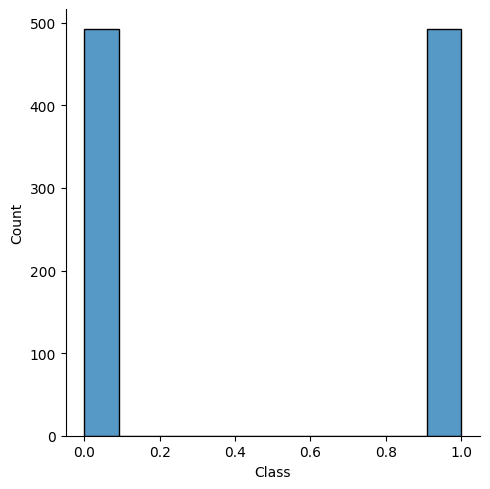

In [56]:
plt.figure(figsize=(8,8))
sns.displot(data=new_dataset, x="Class")

# Splitting the data into features and target

In [41]:
X= new_dataset.drop(columns= 'Class', axis=1)
Y= new_dataset['Class']

In [42]:
print(X,Y)

            Time        V1        V2        V3        V4        V5        V6  \
42611    41171.0 -0.780843  1.069349  0.363702  0.962932  1.437836 -0.885268   
184644  126324.0 -0.246512 -0.289185 -0.073247 -2.316365  0.949729 -1.109238   
247465  153584.0  2.085800 -0.007503 -2.051018  0.211332  0.605291 -0.893311   
119470   75456.0 -0.793171  0.249499  1.121383 -1.467860  0.890981  1.105684   
218945  141533.0  1.717679 -0.280333 -1.833714  1.499256  0.334029 -1.079090   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

# Splitting the data into train test split

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=2)

In [44]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (885, 30) (99, 30)


# Training the model

Here, we are using LogisticRegression model for training our data

In [45]:
model = LogisticRegression()

In [46]:
#Training our data using the model
model.fit(X_train,Y_train)

LogisticRegression()

# Model Evaluation

We are using accuracy score for evaluation

In [48]:
#Accuracy on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [50]:
#printing the accuracy on training data
print("Accuracy on a training data :", training_data_accuracy)

Accuracy on a training data : 0.943502824858757


In [51]:
#Accuracy on the testing data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)


In [52]:
# printing the accuracy on testing data
print("Accuracy on a testing data: ", testing_data_accuracy)

Accuracy on a testing data:  0.9090909090909091


# Building a predictive model

In [53]:
input_data = (0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62,)


# converting the tuple data into numpy array
input_data_as_array = np.asarray(input_data)

#Reshaping the numpy array as we are doing for one instance
input_data_reshaped = input_data_as_array.reshape(1,-1)

# Predicting
prediction = model.predict(input_data_reshaped)
print(prediction)

#making a statement
if (prediction[0]==0):
  print("The transaction has found to be legit.")

else:
  print("The transaction has found to be fraud.")

[0]
The transaction has found to be legit.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
